<a href="https://colab.research.google.com/github/dinesh12-git/DJEventForm/blob/main/Diabetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import zipfile
import os
from PIL import Image
from google.colab import files

**Setting Device**

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")

Using device: cpu


**Upload and Extract Dataset**

In [4]:
print("Upload your dataset ZIP file")
uploaded = files.upload()

zip_filename = list(uploaded.keys())[0]
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

Upload your dataset ZIP file


Saving diabetic_retinopathy_dataset.zip to diabetic_retinopathy_dataset.zip
Dataset extracted successfully!


**Data Transformations**

In [5]:
num_epochs = 30
batchsize = 8
classes = ('No DR', 'DR Present')

transform_bunch = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

dataset = torchvision.datasets.ImageFolder(extract_path, transform=transform_bunch)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batchsize, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batchsize, shuffle=False)

**Data Visualization**

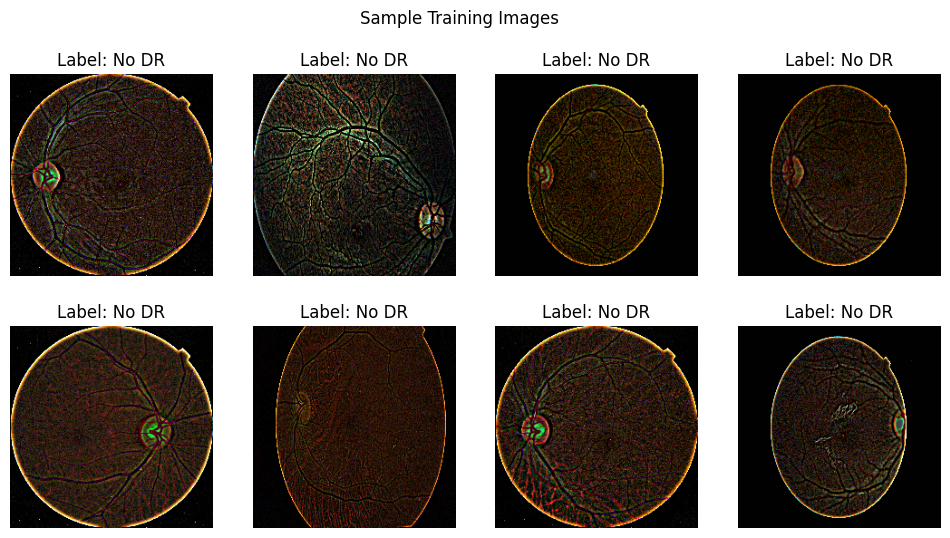

In [6]:
def show_images(images, labels, title="Images", ncols=4):
    fig, axes = plt.subplots(nrows=2, ncols=ncols, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        img = images[i].permute(1, 2, 0).cpu().numpy()
        ax.imshow(img)
        ax.set_title(f'Label: {classes[labels[i].item()]}')
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

images, labels = next(iter(train_loader))
show_images(images, labels, "Sample Training Images")

**Model Building**

In [7]:
class DRNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(64 * 56 * 56, 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

**Initialize Model**

In [8]:
model = DRNet().to(device)
print(model)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

DRNet(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=200704, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=2, bias=True)
  )
)


**Model Training**

In [9]:
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")
    print("Training Completed!")

train_model(model, train_loader, criterion, optimizer, num_epochs)

Epoch 1/30, Loss: 0.0018
Epoch 2/30, Loss: 0.0000
Epoch 3/30, Loss: 0.0000
Epoch 4/30, Loss: 0.0000
Epoch 5/30, Loss: 0.0000
Epoch 6/30, Loss: 0.0000
Epoch 7/30, Loss: 0.0000
Epoch 8/30, Loss: 0.0000
Epoch 9/30, Loss: 0.0000
Epoch 10/30, Loss: 0.0000
Epoch 11/30, Loss: 0.0000
Epoch 12/30, Loss: 0.0000
Epoch 13/30, Loss: 0.0000
Epoch 14/30, Loss: 0.0000
Epoch 15/30, Loss: 0.0000
Epoch 16/30, Loss: 0.0000
Epoch 17/30, Loss: 0.0000
Epoch 18/30, Loss: 0.0000
Epoch 19/30, Loss: 0.0000
Epoch 20/30, Loss: 0.0000
Epoch 21/30, Loss: 0.0000
Epoch 22/30, Loss: 0.0000
Epoch 23/30, Loss: 0.0000
Epoch 24/30, Loss: 0.0000
Epoch 25/30, Loss: 0.0000
Epoch 26/30, Loss: 0.0000
Epoch 27/30, Loss: 0.0000
Epoch 28/30, Loss: 0.0000
Epoch 29/30, Loss: 0.0000
Epoch 30/30, Loss: 0.0000
Training Completed!


**Model Evaluation**

In [10]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total:.2f}%')

evaluate_model(model, test_loader)

Accuracy: 100.00%


**Save Model**

In [11]:
torch.save(model.state_dict(), "diabetic_retinopathy_model.pth")

**Predict and Visualize New Image**

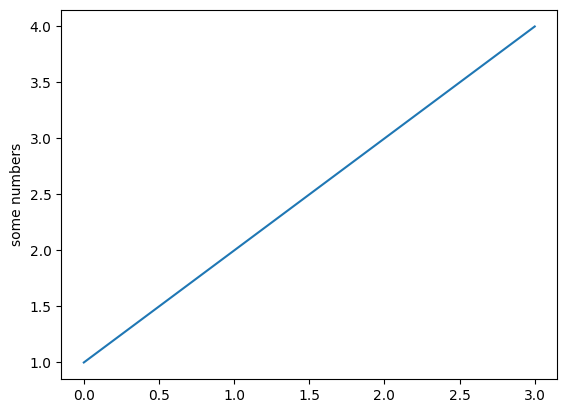

In [14]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.savefig('test_plot.png')
def predict_image(image_path, model):
    model.eval()
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ])
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(image_tensor)
        _, prediction = torch.max(output, 1)

    # Save and display image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"Prediction: {classes[prediction.item()]}")
    plt.axis("off")
    plt.savefig("prediction.png")  # Save the plot to a file
    print(f"Prediction saved to prediction.png")
    print(f"Predicted Label: {classes[prediction.item()]}")